In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
file_path = '/content/Furniture.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [ ]:
missing_values = data.isnull().sum()


print(missing_values)

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64


### as we see here, there is no null values, we don't need to handle anything

In [ ]:
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].unique()}")


category_mapping = {
    'Bed': 0, 'Chair': 1, 'Table': 2, 'Desk': 3, 'Sofa': 4, 'Wardrobe': 5
}

material_mapping = {
    'Plastic': 0, 'Glass': 1, 'Metal': 2, 'Fabric': 3, 'Wood': 4
}

color_mapping = {
    'Red': 0, 'Blue': 1, 'Black': 2, 'Green': 3, 'Brown': 4, 'White': 5, 'Yellow': 6, 'Purple': 7, 'Pink': 8, 'Orange': 9
}

location_mapping = {
    'Rural': 0, 'Suburban': 1, 'Urban': 2
}

season_mapping = {
    'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3
}

store_type_mapping = {
    'Online': 0, 'Retail': 1, 'Mall': 2
}

brand_mapping = {
    'BrandA': 0, 'BrandD': 1, 'BrandB': 2, 'BrandC': 3
}

data['category'] = data['category'].replace(category_mapping)
data['material'] = data['material'].replace(material_mapping)
data['color'] = data['color'].replace(color_mapping)
data['location'] = data['location'].replace(location_mapping)
data['season'] = data['season'].replace(season_mapping)
data['store_type'] = data['store_type'].replace(store_type_mapping)
data['brand'] = data['brand'].replace(brand_mapping)



Unique values in category: ['Bed' 'Chair' 'Table' 'Sofa' 'Desk']
Unique values in material: ['Plastic' 'Glass' 'Metal' 'Wood' 'Fabric']
Unique values in color: ['Red' 'Blue' 'Black' 'Green' 'Brown' 'White']
Unique values in location: ['Rural' 'Suburban' 'Urban']
Unique values in season: ['Spring' 'Summer' 'Fall' 'Winter']
Unique values in store_type: ['Online' 'Retail']
Unique values in brand: ['BrandA' 'BrandD' 'BrandB' 'BrandC']


In [ ]:
data.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,0,0,0,0,0,0,0,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,1,1,1,0,1,0,1,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,2,2,2,1,2,0,1,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,2,1,3,0,1,1,1,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,1,1,4,0,2,0,1,-4588.255733


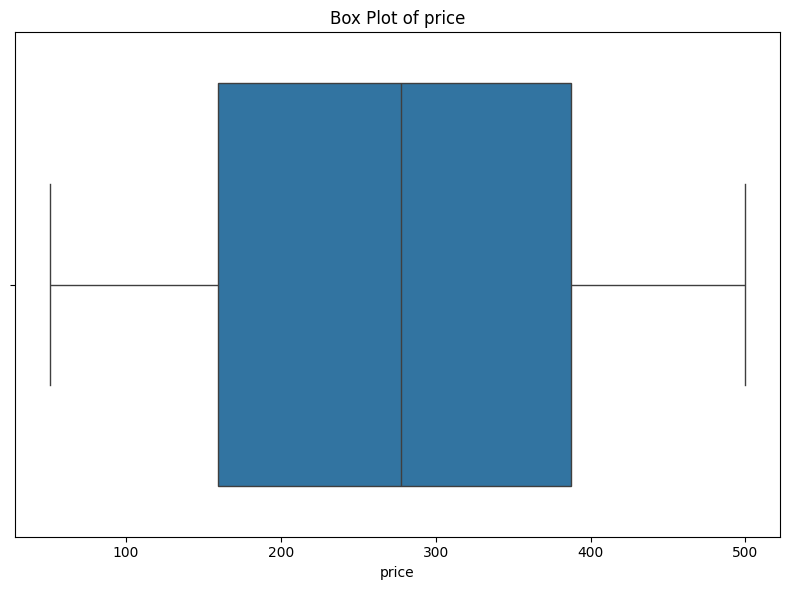

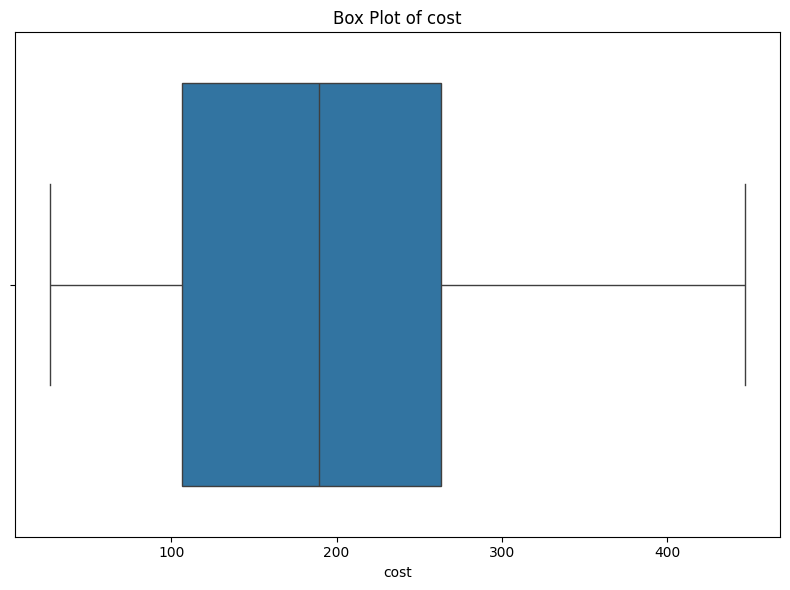

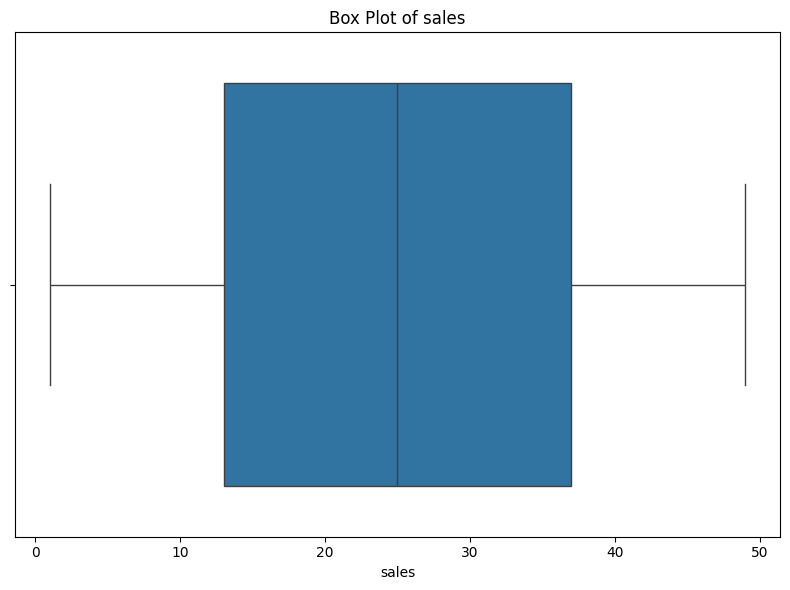

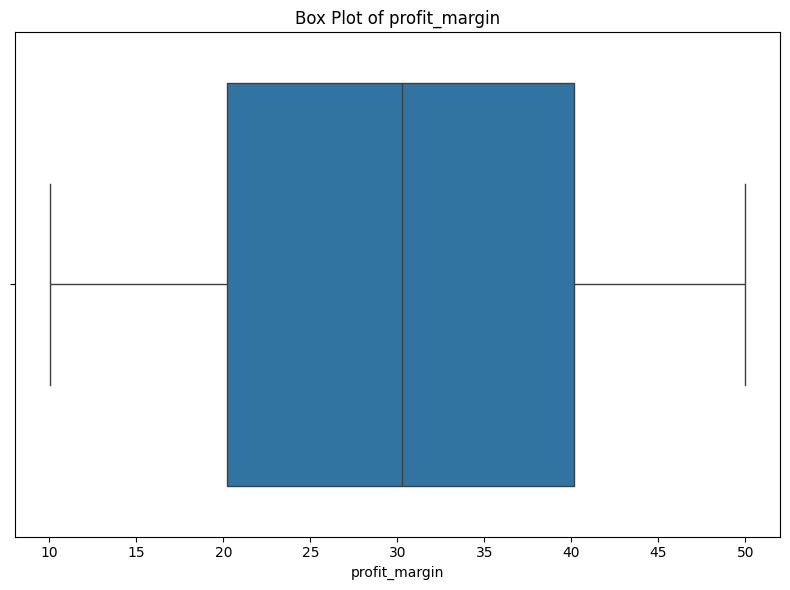

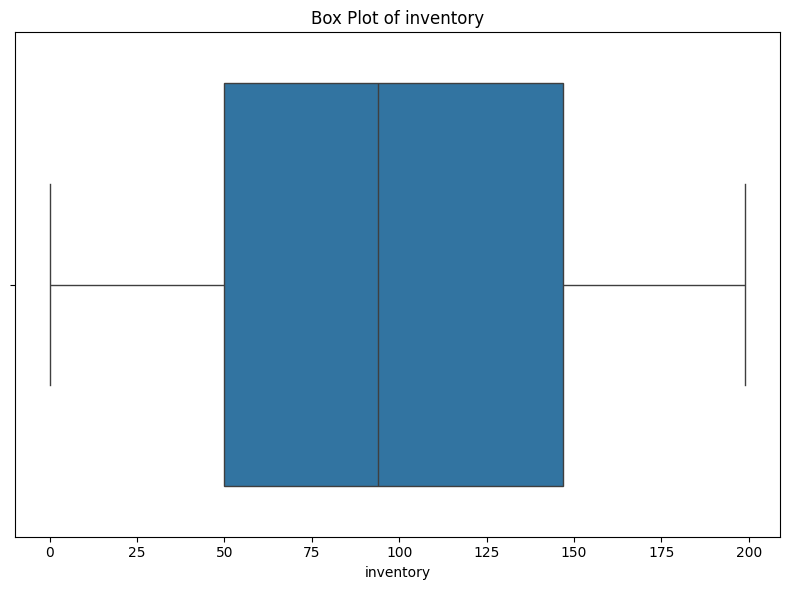

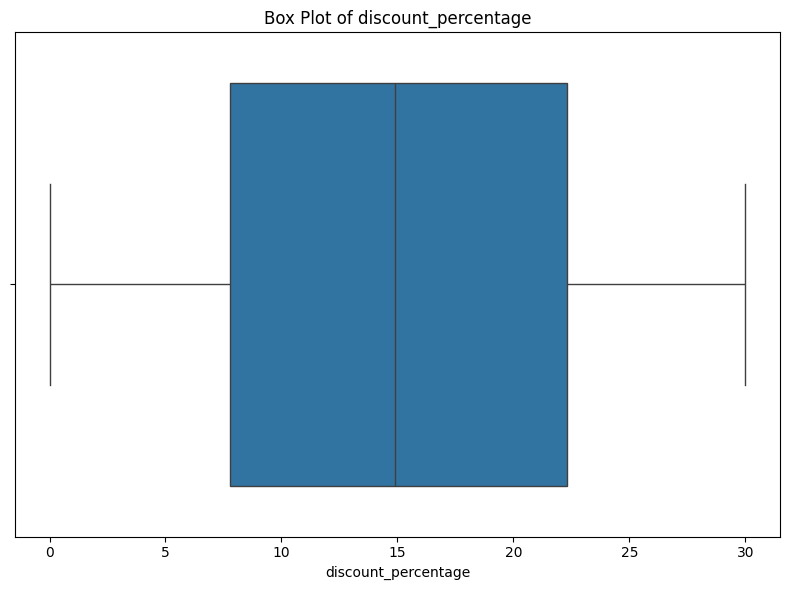

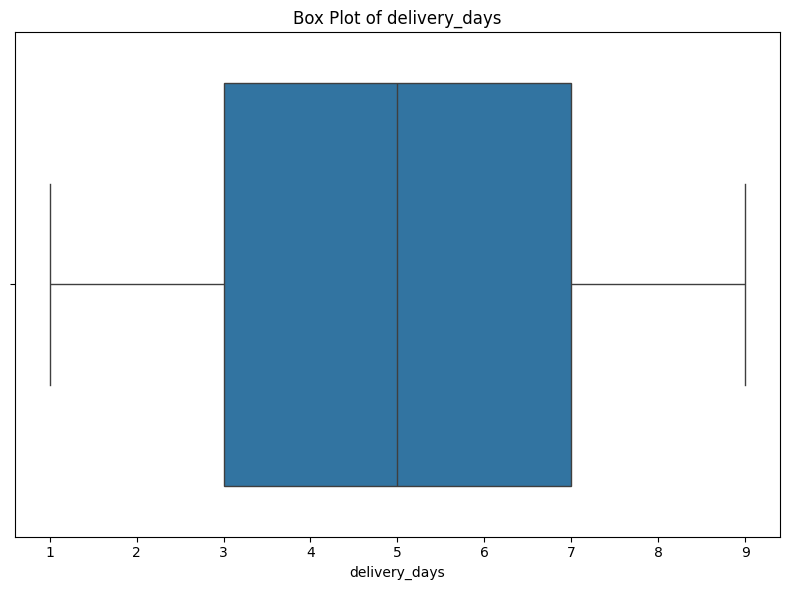

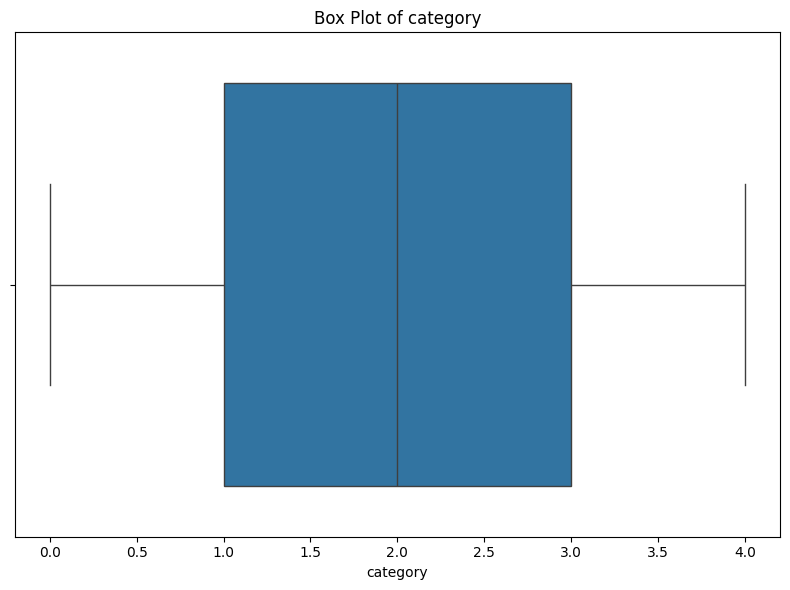

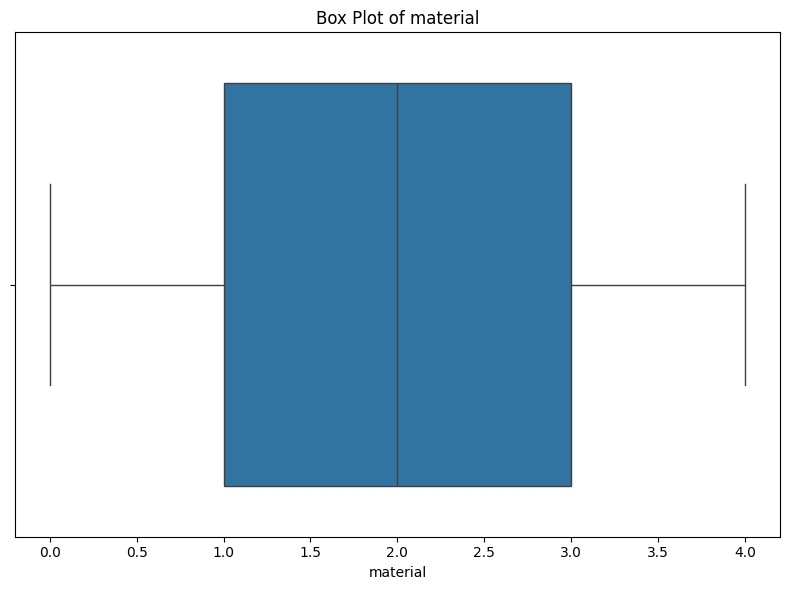

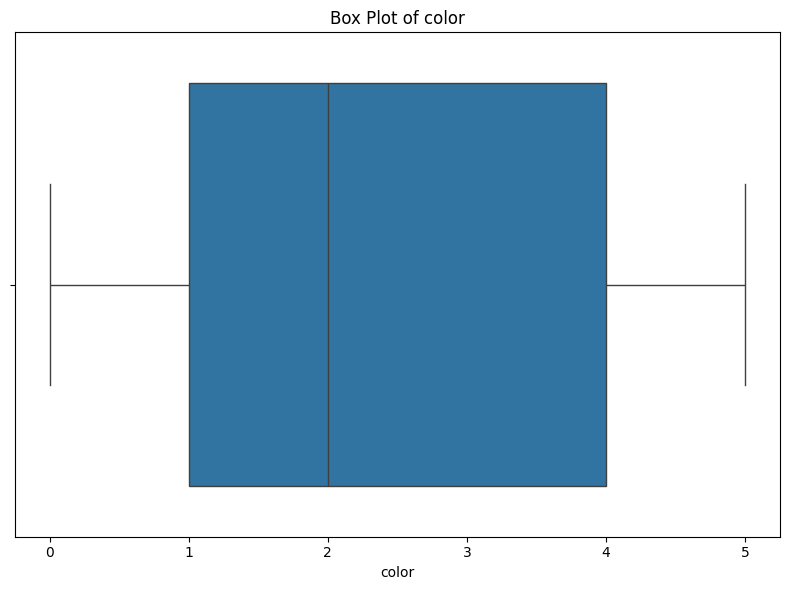

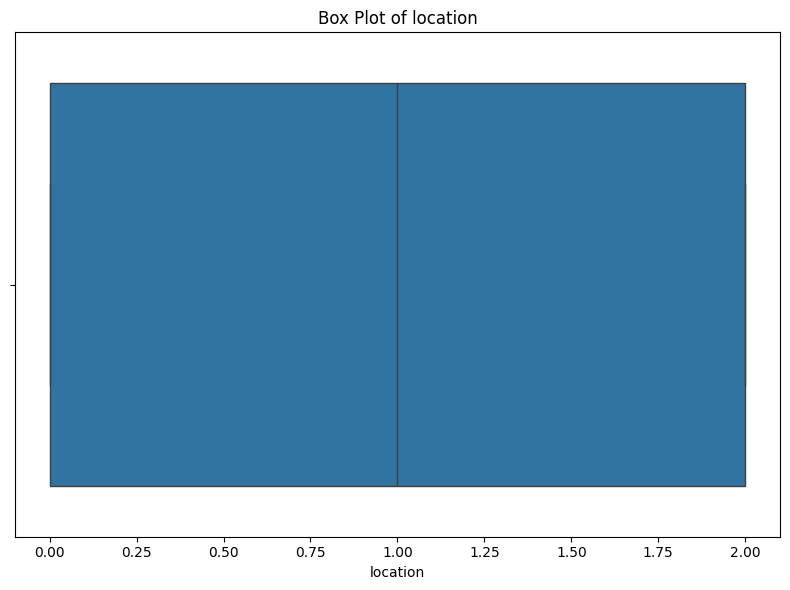

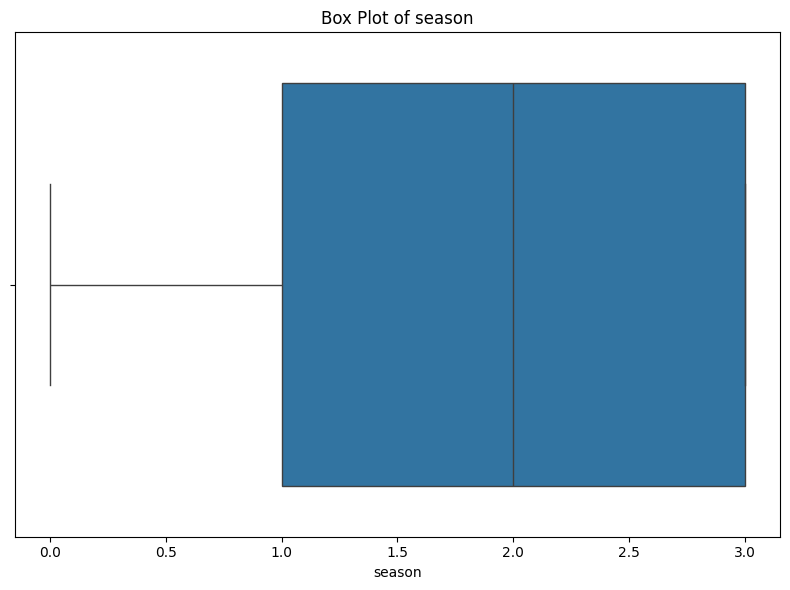

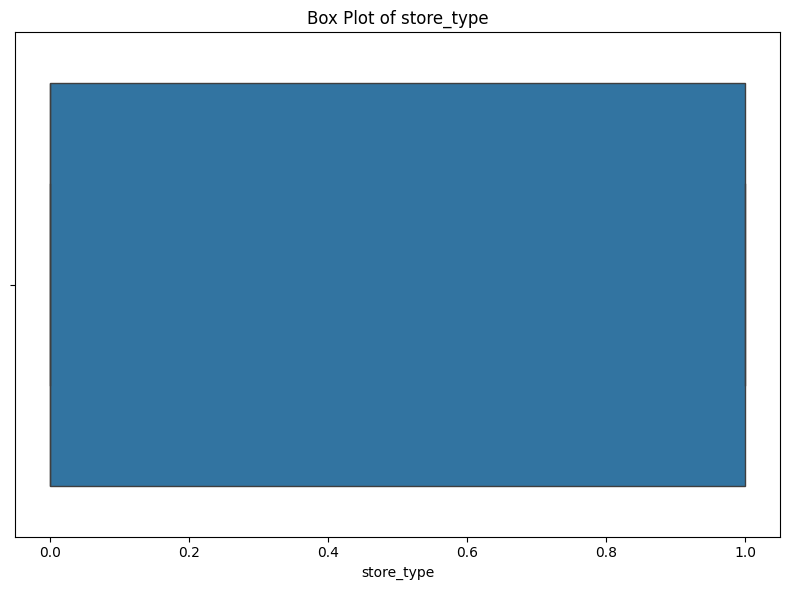

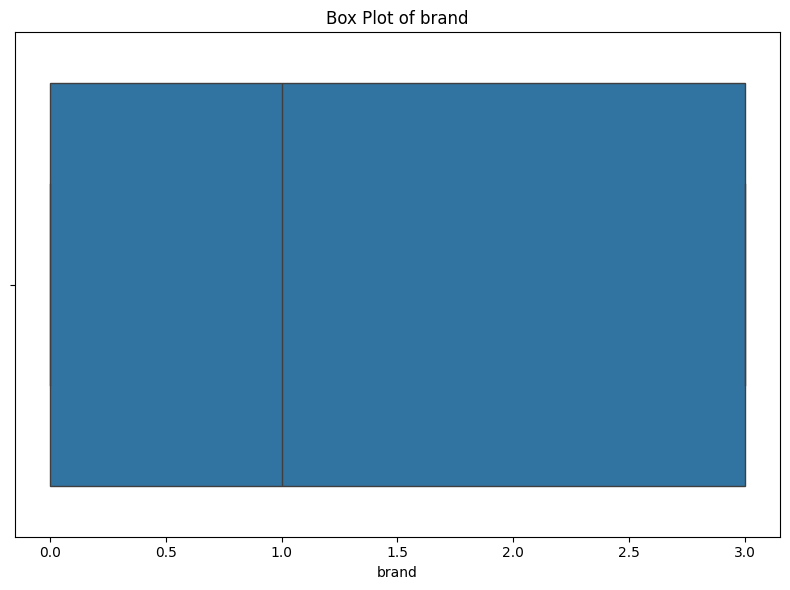

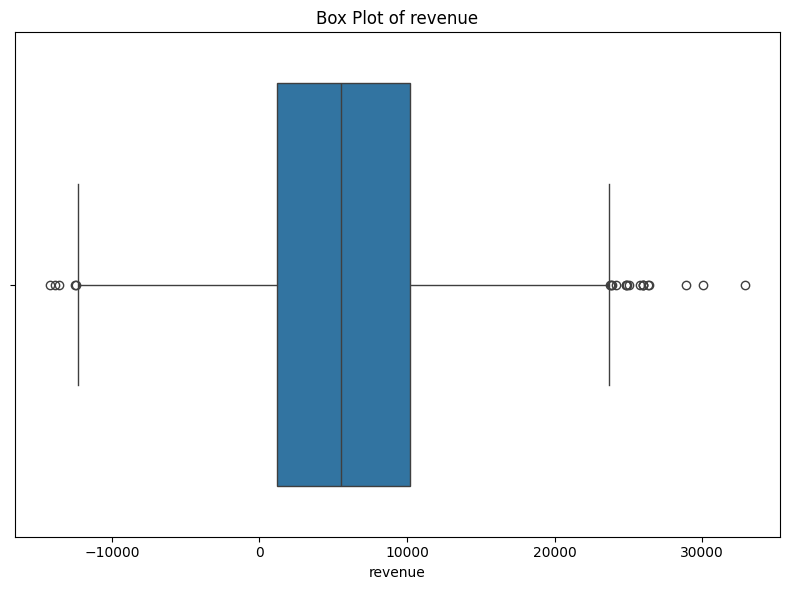

In [ ]:
numerical_features = data.select_dtypes(include=['number'])

for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

In [ ]:
def remove_outliers_iqr(data, column):
    """Removes outliers from a pandas DataFrame column using the IQR method.

    Args:
        data: pandas DataFrame.
        column: Name of the column to remove outliers from.

    Returns:
        pandas DataFrame with outliers removed.
    """

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered


for column in numerical_features.columns:
  data = remove_outliers_iqr(data, column)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2478 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2478 non-null   float64
 1   cost                 2478 non-null   float64
 2   sales                2478 non-null   int64  
 3   profit_margin        2478 non-null   float64
 4   inventory            2478 non-null   int64  
 5   discount_percentage  2478 non-null   float64
 6   delivery_days        2478 non-null   int64  
 7   category             2478 non-null   int64  
 8   material             2478 non-null   int64  
 9   color                2478 non-null   int64  
 10  location             2478 non-null   int64  
 11  season               2478 non-null   int64  
 12  store_type           2478 non-null   int64  
 13  brand                2478 non-null   int64  
 14  revenue              2478 non-null   float64
dtypes: float64(5), int64(10)
memory usage: 309.

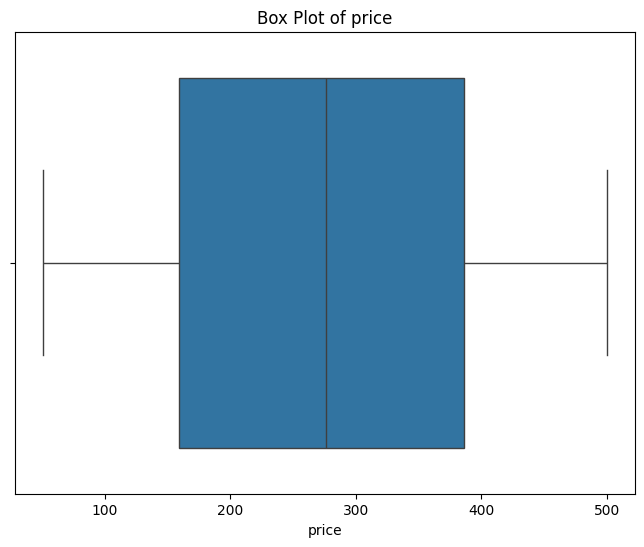

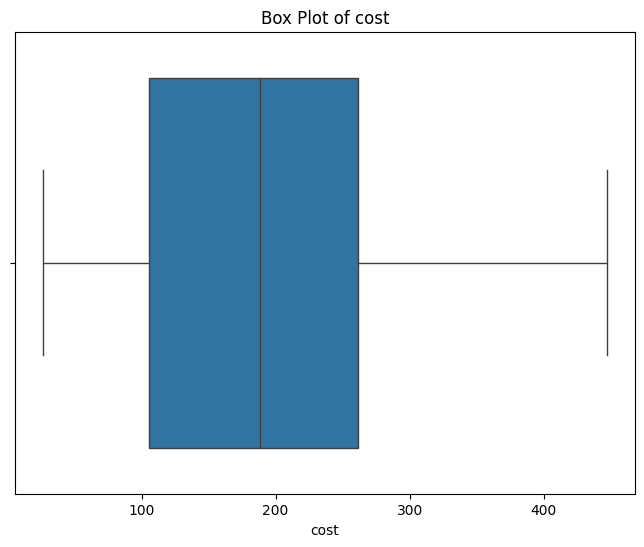

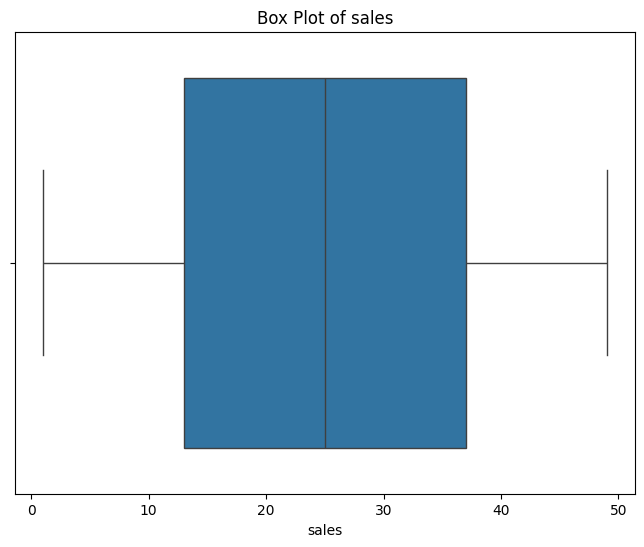

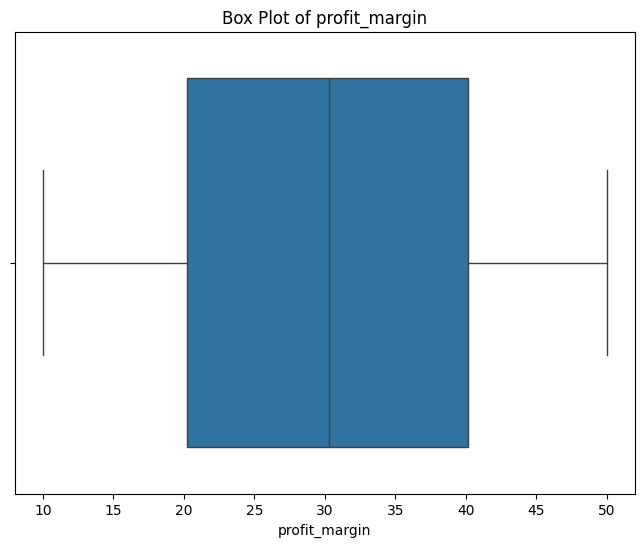

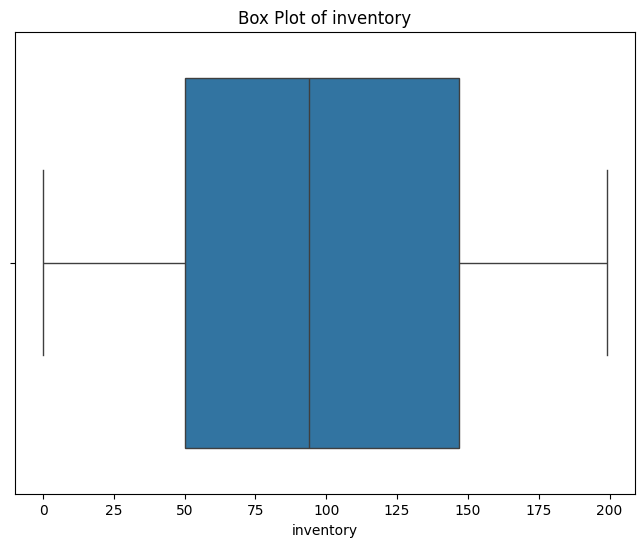

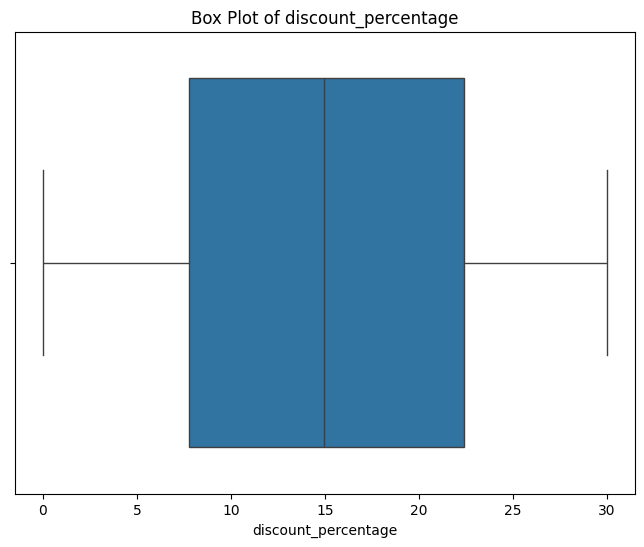

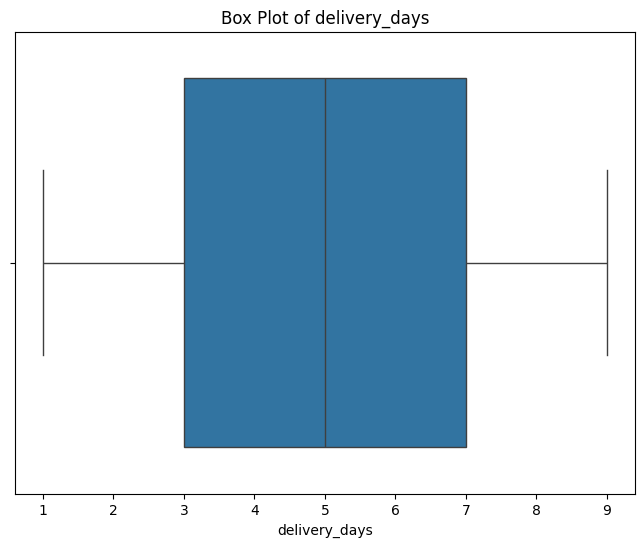

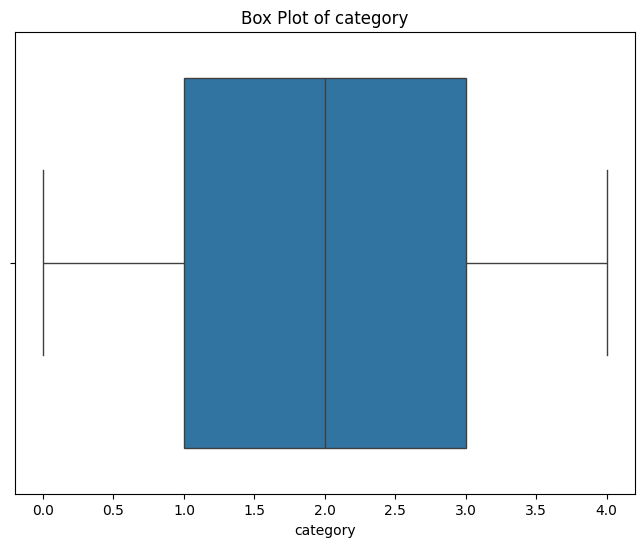

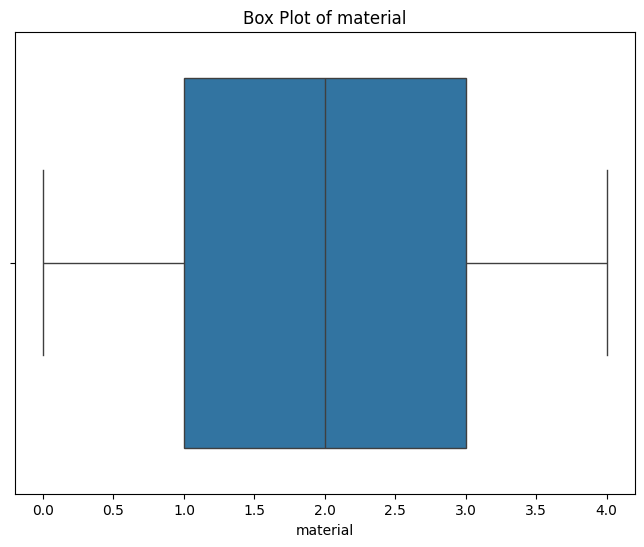

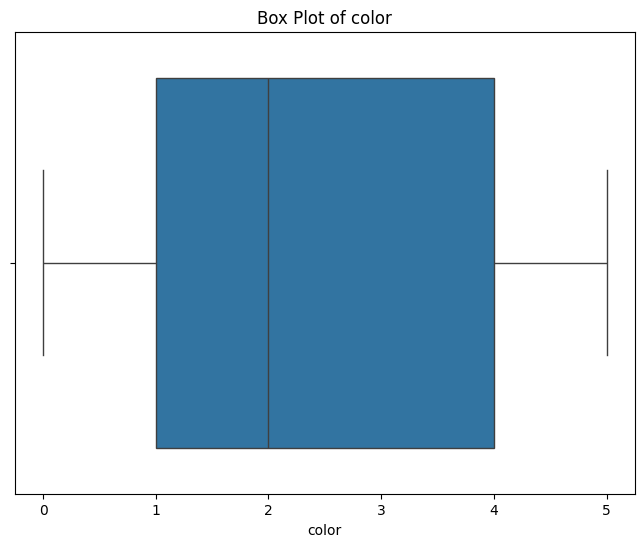

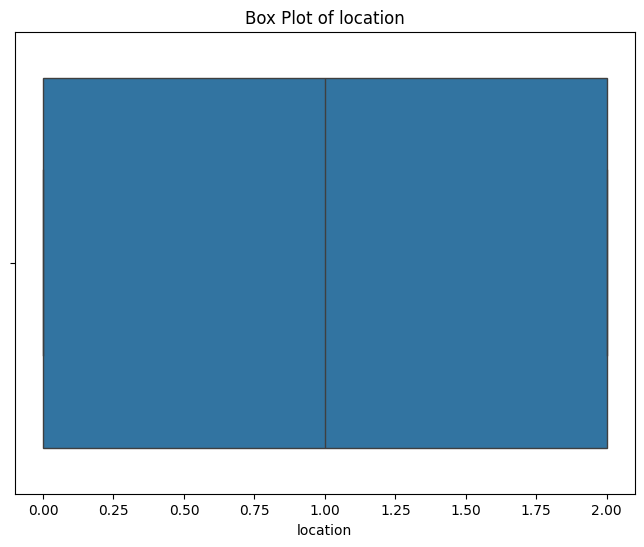

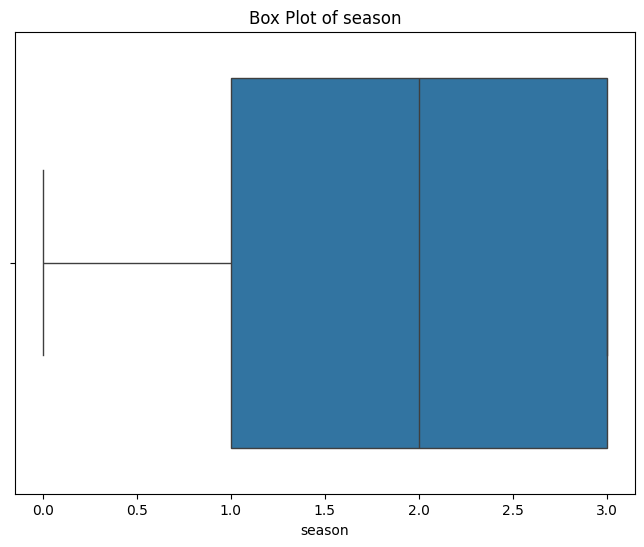

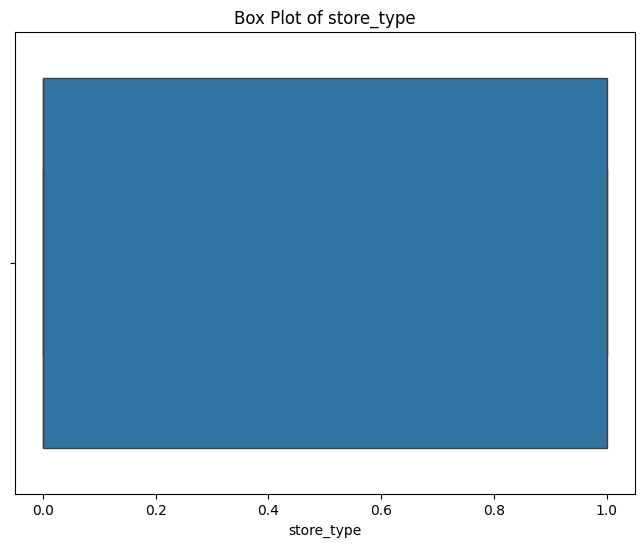

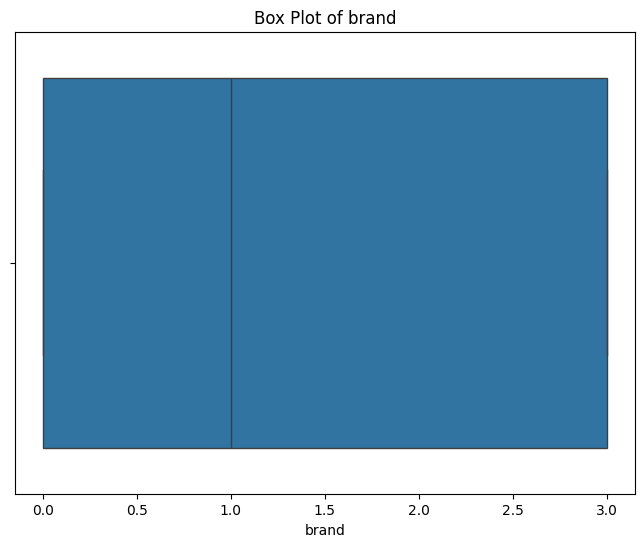

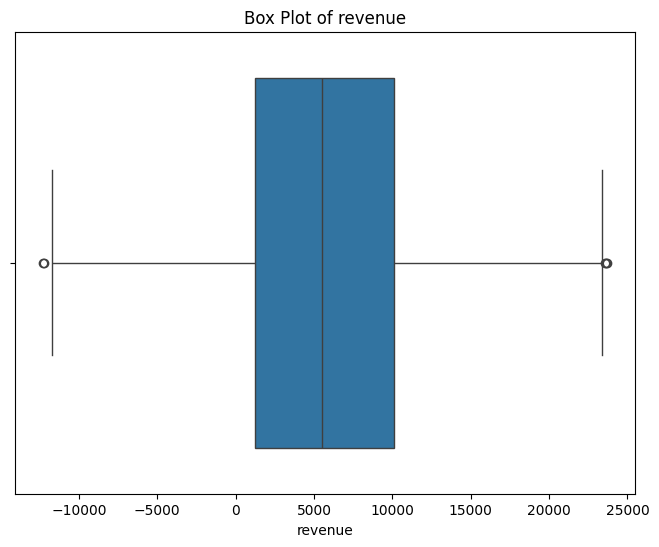

In [ ]:
numerical_features = data.select_dtypes(include=['number'])


for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

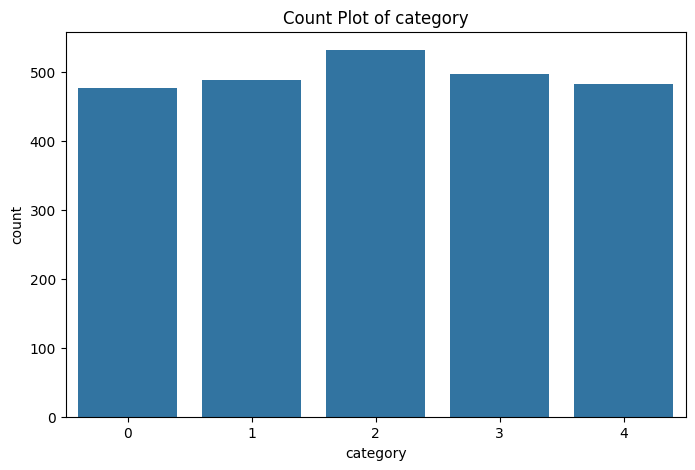

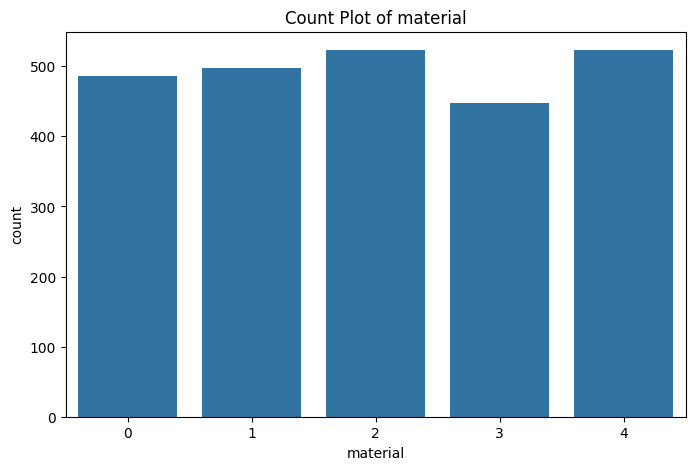

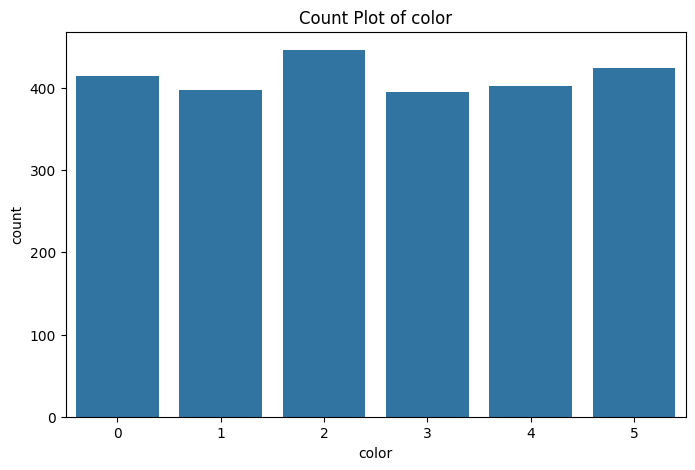

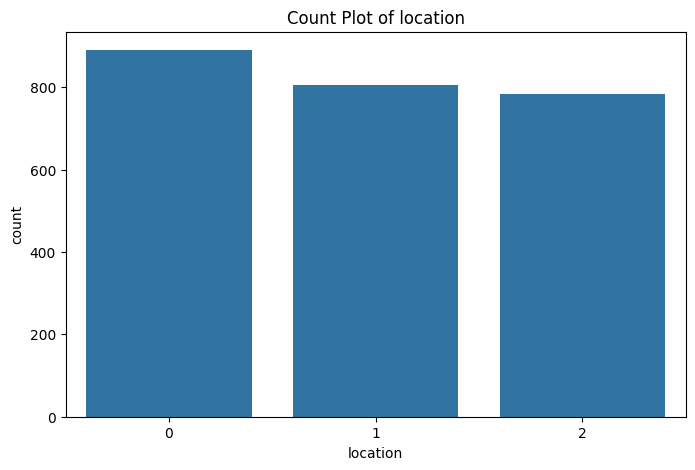

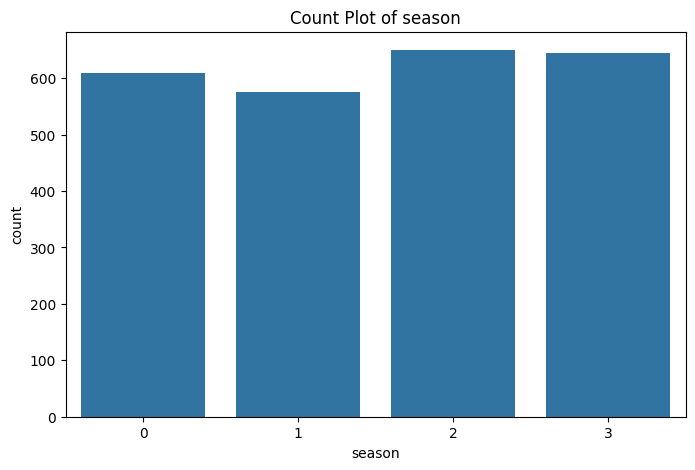

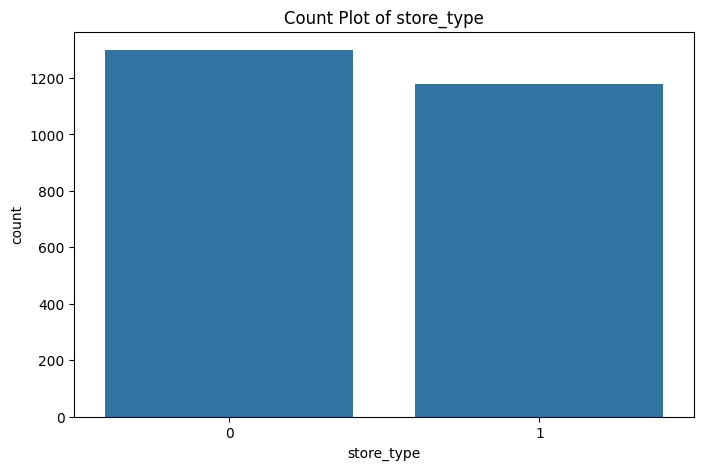

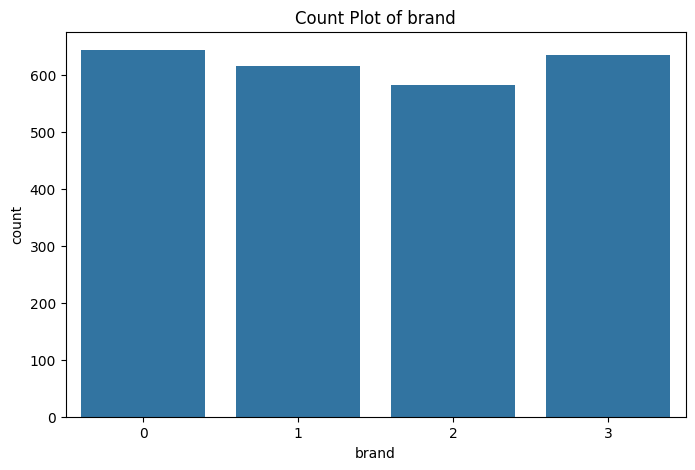

In [ ]:
categorical_cols_mapped = ['category', 'material', 'color', 'location', 'season', 'store_type', 'brand']

for col in categorical_cols_mapped:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.show()



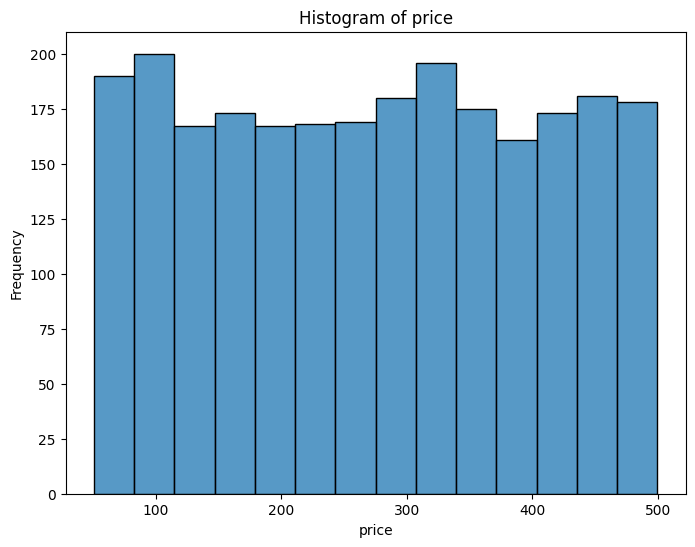

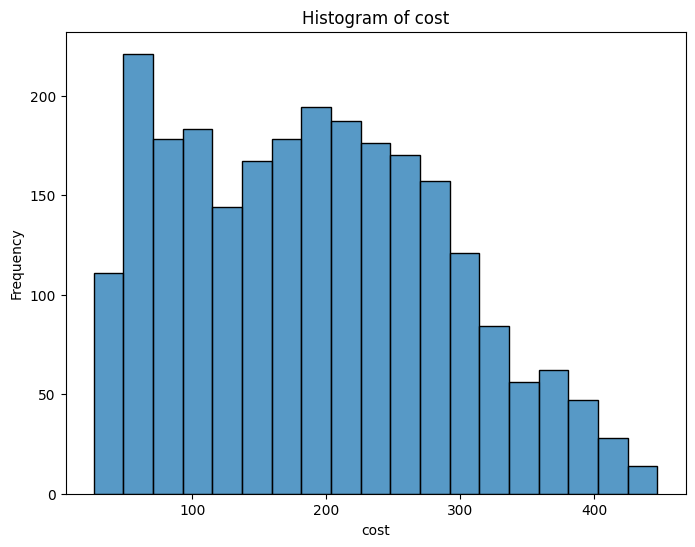

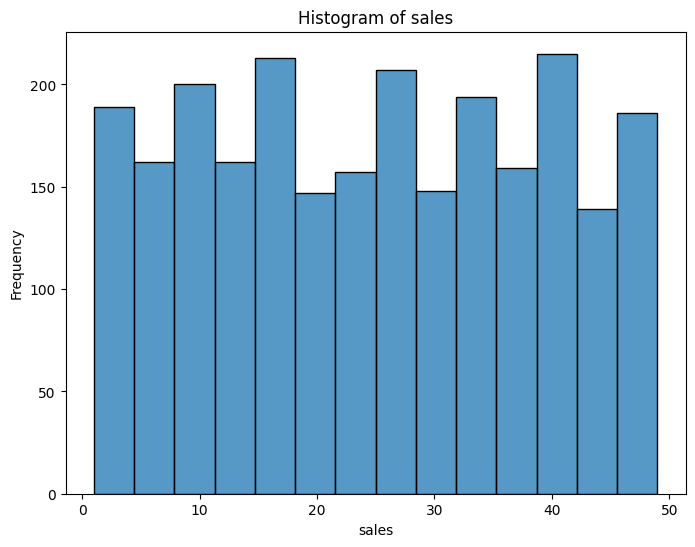

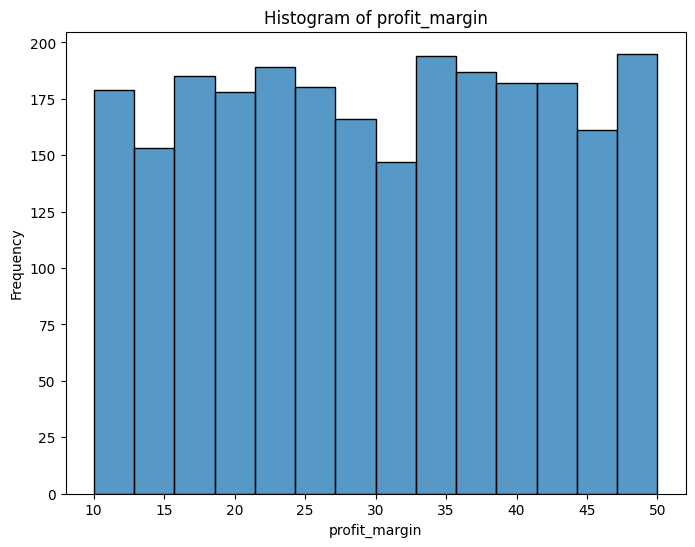

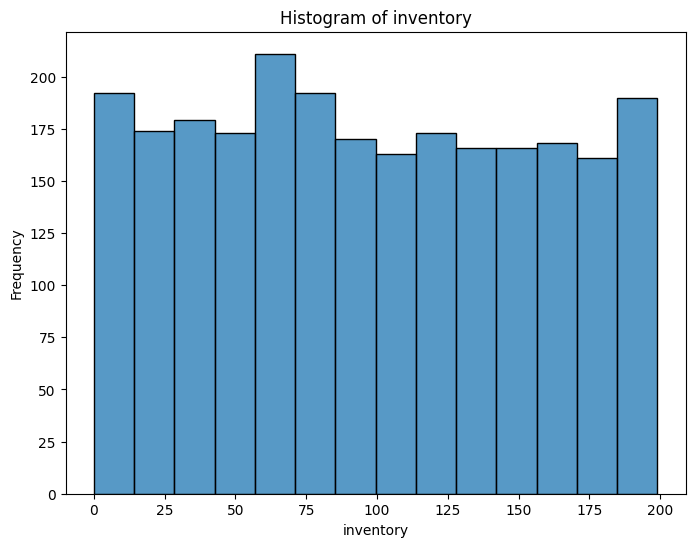

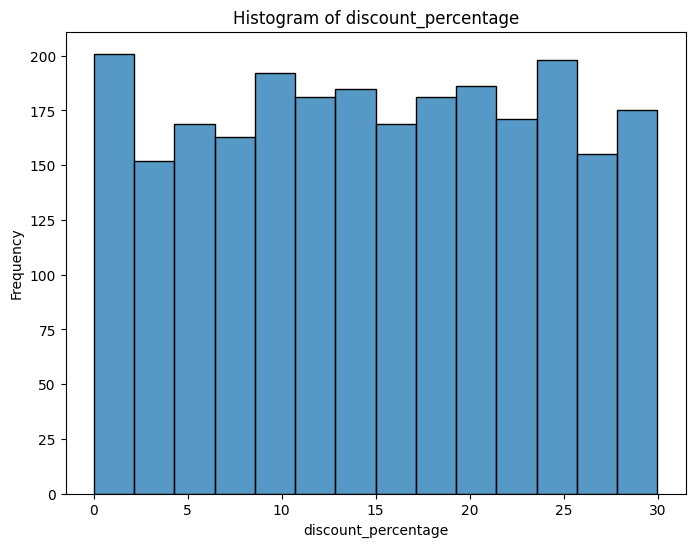

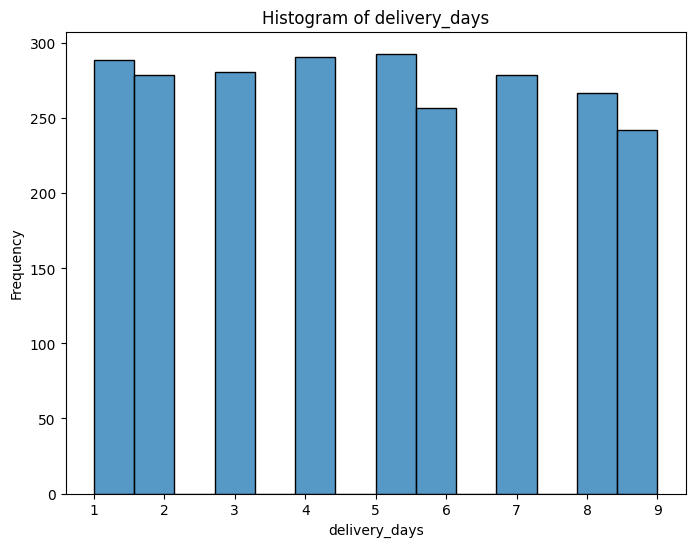

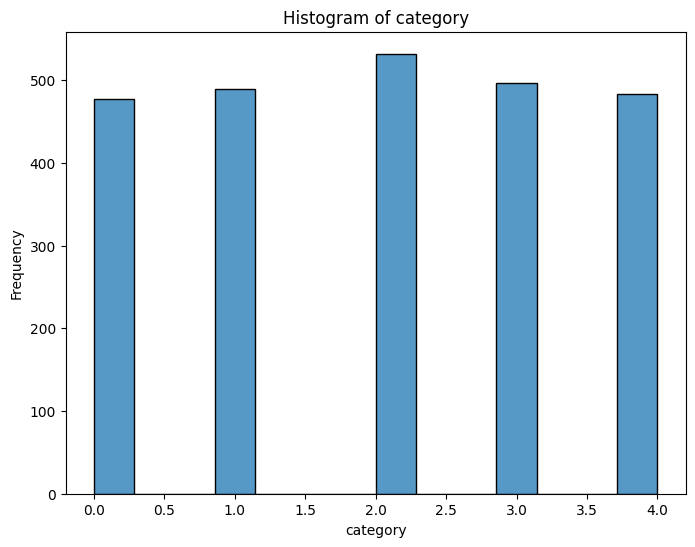

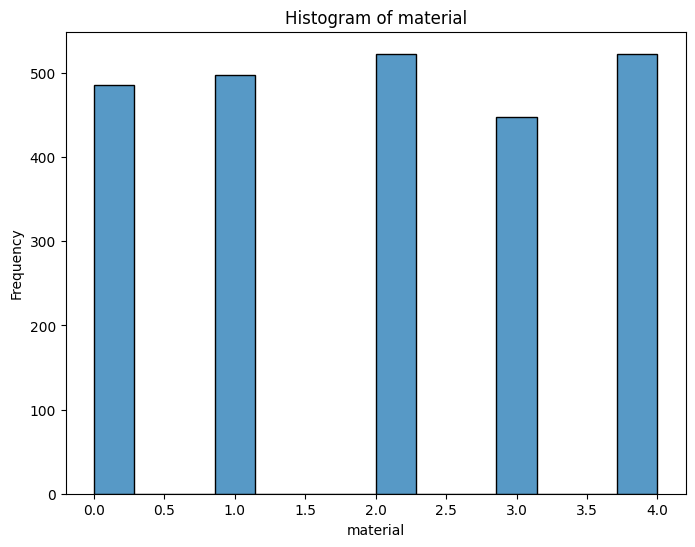

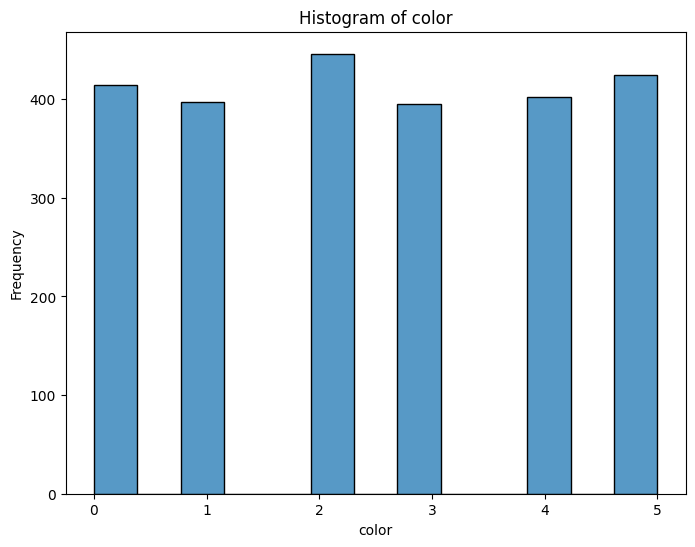

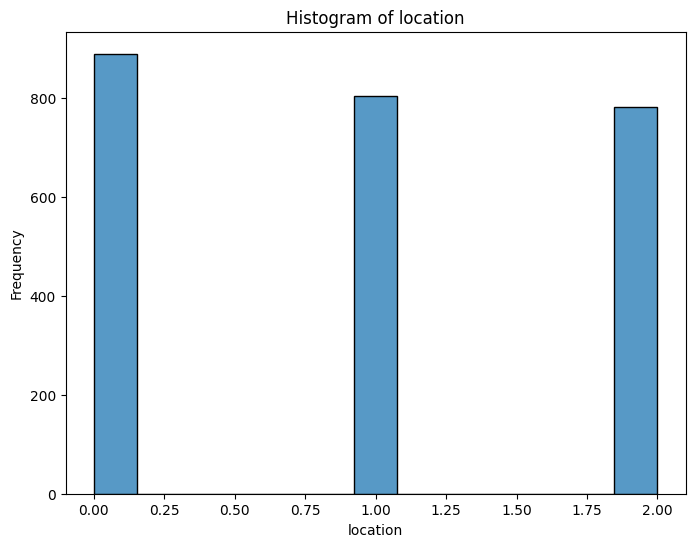

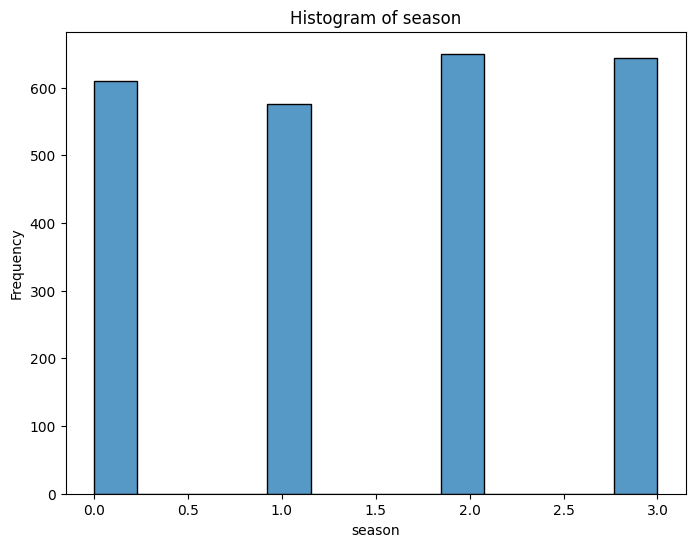

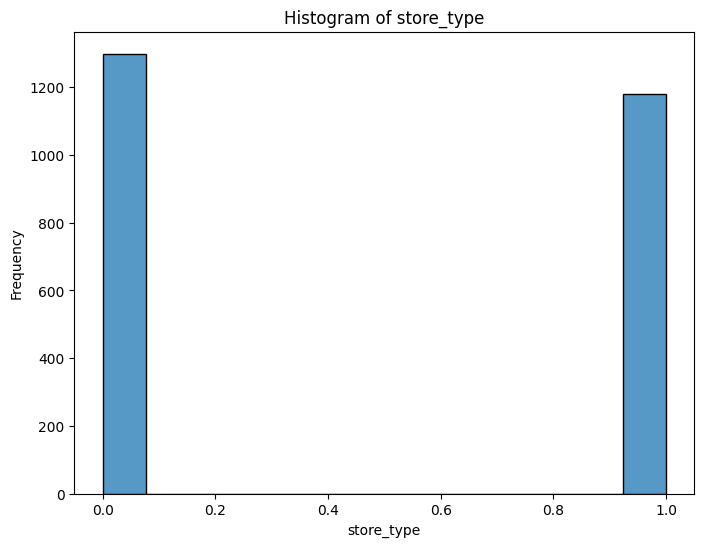

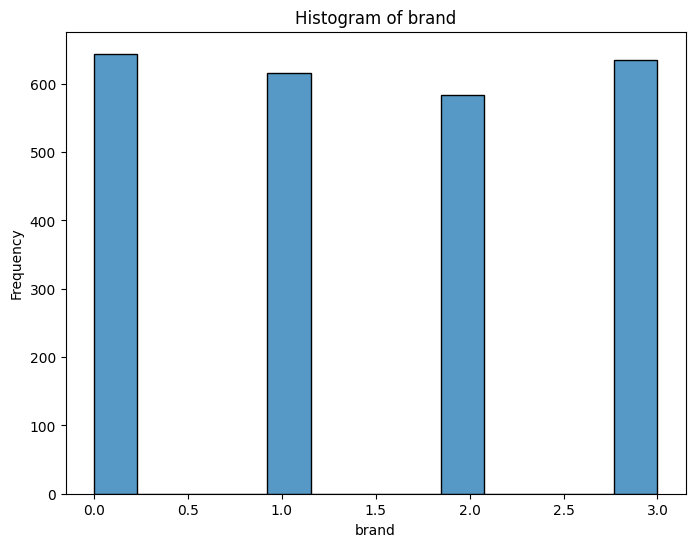

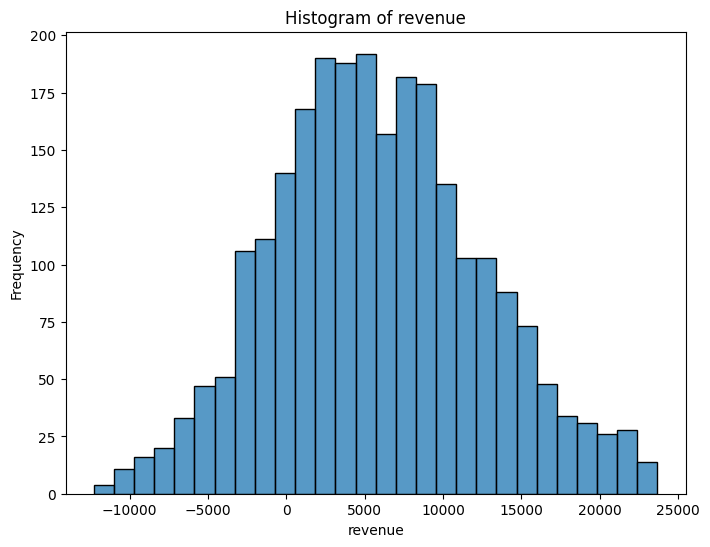

In [ ]:
numerical_features = data.select_dtypes(include=['number'])
for column in numerical_features.columns:
       plt.figure(figsize=(8, 6))
       sns.histplot(data[column])
       plt.title(f'Histogram of {column}')
       plt.xlabel(column)
       plt.ylabel('Frequency')
       plt.show()
categorical_features = data.select_dtypes(include=['object'])
for column in categorical_features.columns:
       plt.figure(figsize=(8, 6))
       sns.countplot(x=data[column], order=data[column].value_counts().index)
       plt.title(f'Count Plot of {column}')
       plt.xlabel(column)
       plt.ylabel('Count')
       plt.xticks(rotation=45, ha='right')
       plt.show()

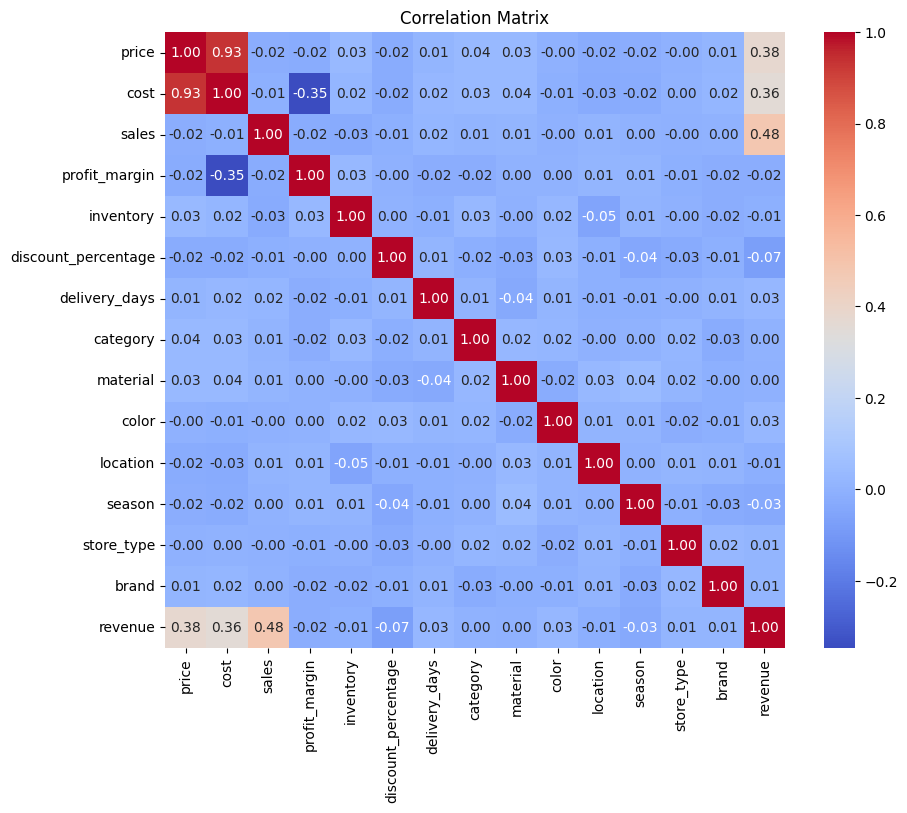

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
high_corr_threshold = 0.9
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

print("Highly correlated feature pairs (absolute correlation > 0.9):")
for feature1, feature2, corr_value in highly_correlated_pairs:
    print(f"  - {feature1} and {feature2}: {corr_value:.2f}")

features_to_drop = ['cost']
print(f"\nFeatures to drop based on high correlation: {features_to_drop}")

features_after_selection = [col for col in data.columns if col not in features_to_drop]
print(f"Features after selection: {features_after_selection}")


Highly correlated feature pairs (absolute correlation > 0.9):
  - cost and price: 0.93

Features to drop based on high correlation: ['cost']
Features after selection: ['price', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'category', 'material', 'color', 'location', 'season', 'store_type', 'brand', 'revenue']


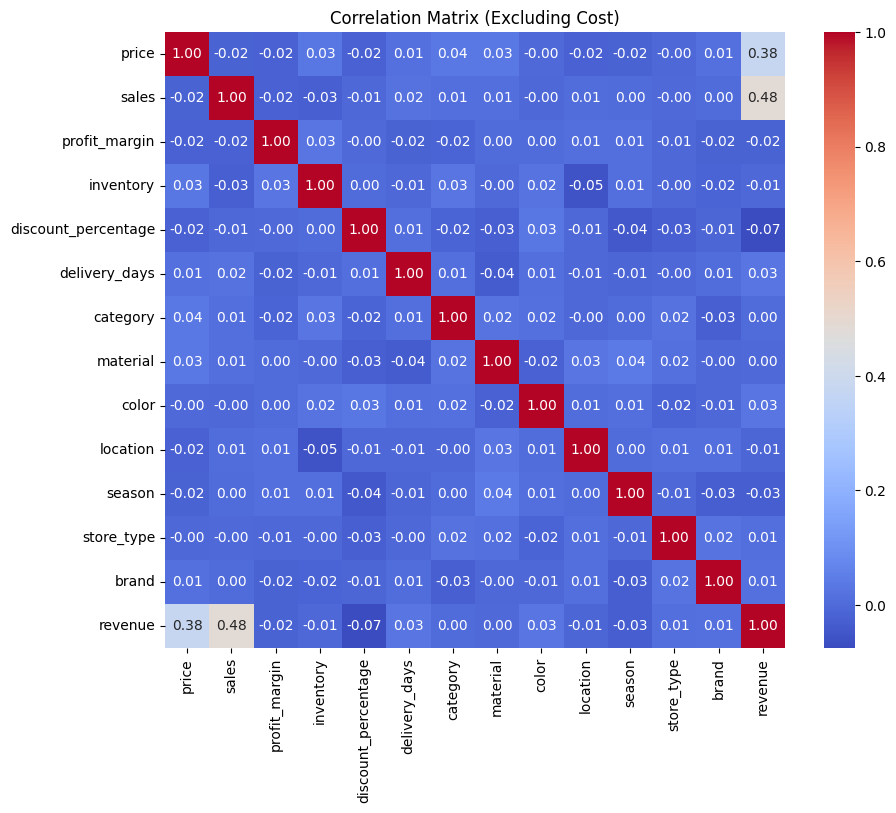

In [ ]:

data_for_corr = data.drop(columns=['cost'])

correlation_matrix = data_for_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Excluding Cost)')
plt.show()

## Model training




In [ ]:
features = ['price', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'category', 'material', 'color', 'location', 'season', 'store_type', 'brand']
target = 'revenue'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


median_revenue = data['revenue'].median()
y_classified = (data['revenue'] > median_revenue).astype(int)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classified, test_size=0.2, random_state=42)

scaler_clf = StandardScaler()
X_train_scaled_clf = scaler_clf.fit_transform(X_train_clf)
X_test_scaled_clf = scaler_clf.transform(X_test_clf)

svm_model = SVC(probability=True, random_state=42)

svm_model.fit(X_train_scaled_clf, y_train_clf)

SVC(probability=True, random_state=42)

Accuracy: 0.74
Precision: 0.78
Recall: 0.67
F1-Score: 0.72


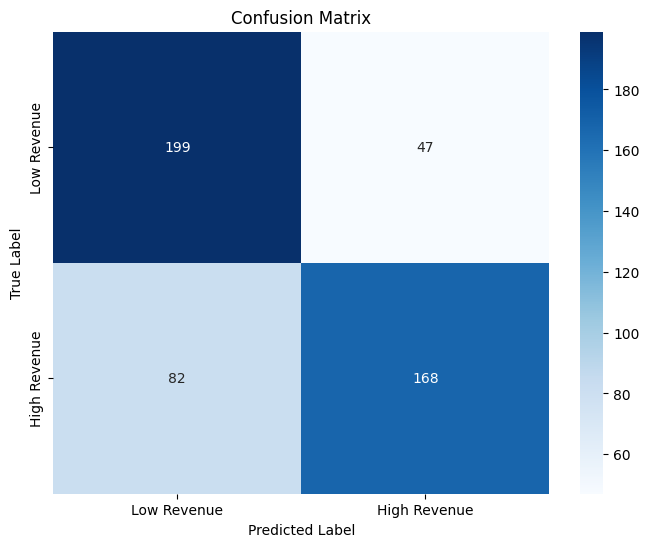

In [ ]:
y_pred_clf = svm_model.predict(X_test_scaled_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Revenue', 'High Revenue'], yticklabels=['Low Revenue', 'High Revenue'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy (RBF): 0.7399193548387096
Precision (RBF): 0.7450854039132558
Recall (RBF): 0.7399193548387096
F1-score (RBF): 0.7387678276305318
Confusion Matrix (RBF):
[[199  47]
 [ 82 168]]


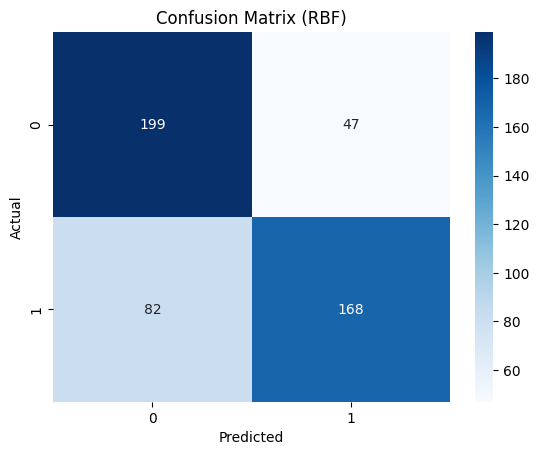

In [ ]:
features = ['price', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'category', 'material', 'color', 'location', 'season', 'store_type', 'brand']
target = 'revenue'
svm_classifier_rbf = SVC(kernel='rbf')
svm_classifier_rbf.fit(X_train_scaled_clf, y_train_clf)
scaler = StandardScaler()


y_pred_rbf = svm_classifier_rbf.predict(X_test_scaled_clf)


accuracy_rbf = accuracy_score(y_test_clf, y_pred_rbf)
precision_rbf = precision_score(y_test_clf, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test_clf, y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test_clf, y_pred_rbf, average='weighted')


print(f"Accuracy (RBF): {accuracy_rbf}")
print(f"Precision (RBF): {precision_rbf}")
print(f"Recall (RBF): {recall_rbf}")
print(f"F1-score (RBF): {f1_rbf}")


cm_rbf = confusion_matrix(y_test_clf, y_pred_rbf)
print("Confusion Matrix (RBF):")
print(cm_rbf)


sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (RBF)")
plt.show()

In [ ]:

svm_classifier_linear = SVC(kernel='linear', random_state=42)
svm_classifier_linear.fit(X_train_scaled_clf, y_train_clf)



SVC(kernel='linear', random_state=42)

Accuracy (Linear Kernel): 0.717741935483871
Precision (Linear Kernel): 0.7180421179024176
Recall (Linear Kernel): 0.717741935483871
F1-score (Linear Kernel): 0.7177052189876738
Confusion Matrix (Linear Kernel):
[[180  66]
 [ 74 176]]


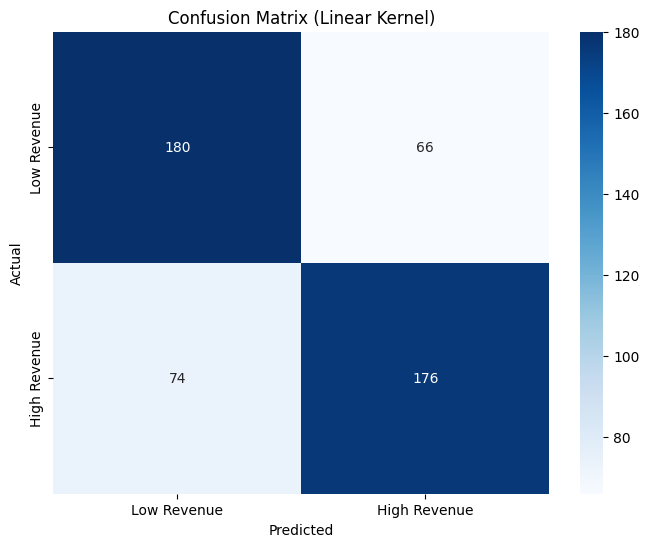

In [ ]:

y_pred_linear = svm_classifier_linear.predict(X_test_scaled_clf)


accuracy_linear = accuracy_score(y_test_clf, y_pred_linear)
precision_linear = precision_score(y_test_clf, y_pred_linear, average='weighted')
recall_linear = recall_score(y_test_clf, y_pred_linear, average='weighted')
f1_linear = f1_score(y_test_clf, y_pred_linear, average='weighted')

print(f"Accuracy (Linear Kernel): {accuracy_linear}")
print(f"Precision (Linear Kernel): {precision_linear}")
print(f"Recall (Linear Kernel): {recall_linear}")
print(f"F1-score (Linear Kernel): {f1_linear}")


cm_linear = confusion_matrix(y_test_clf, y_pred_linear)
print("Confusion Matrix (Linear Kernel):")
print(cm_linear)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Revenue', 'High Revenue'], yticklabels=['Low Revenue', 'High Revenue'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Linear Kernel)")
plt.show()